In [1]:
import import_ipynb
import cv2
import matplotlib.pyplot as plt
import camera
import arduino
import time
import numpy as np

importing Jupyter notebook from camera.ipynb
importing Jupyter notebook from arduino.ipynb


In [2]:
def find(cap, ser):
    #Up 20 step
    for i in range(20):        
        img = camera.camRead(cap) 
        cv2.namedWindow('img', cv2.WINDOW_KEEPRATIO)
        cv2.imshow('img',img)
        time.sleep(0.03)
        cv2.waitKey(1)
        Up(ser)

    #Down 40 step and record the change of clarity
    list1 = []
    for i in range(40):
        time.sleep(0.03)
        img = camera.camRead(cap) 
        cv2.imshow('img',img)
        cv2.waitKey(1)
        sc = score(img)
        list1.append(sc)
        Down(ser)
    
    #if there is nothing on the screen, just return to the original place and skip
    if(blank(list1)):
        for i in range(22):
            img = camera.camRead(cap) 
            cv2.imshow('img',img)
            cv2.waitKey(1)
            Up(ser)
        #cv2.destroyAllWindows()
        return False

    #find max value
    maxsc = max(list1)
    maxindex = list1.index(maxsc)
    

    for i in range(len(list1)-maxindex+2):
        time.sleep(0.03)
        img = camera.camRead(cap) 
        cv2.imshow('img',img)
        cv2.waitKey(1)
        Up(ser)
     
    img = camera.camRead(cap)     
    cv2.imshow('img',img)
    #name = 'img/test.jpg'
    #cv2.imwrite(name, img)
    plt.plot(list1)
    plt.show()
    #cv2.destroyAllWindows()
    
    return True


In [3]:
def score(img):

    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.blur(img, (5,5))
    
    ma = np.max(img)
    mi = np.min(img)    
    sc = ma - mi

    return sc

In [4]:
def score1(img):

    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.blur(img, (5,5))
    img = cv2.Canny(img, 12,24) 
    
    sc = np.sum(img)

    return sc

In [5]:
def blank(list1):
    if max(list1)>100:
        return False
    else:
        print('Nothing on the screen.')
        return True

In [6]:
def Up(ser):
    if(arduino.send('U', ser)):
        return

In [7]:
def Down(ser):
    if(arduino.send('D', ser)):
        return

In [8]:
def sweep(direction, ser):
    if direction == 1:
        Up(ser)
    else:
        Down(ser)

In [223]:
if __name__ == '__main__':
    ser = arduino.openSer()
    cap = camera.openCam()

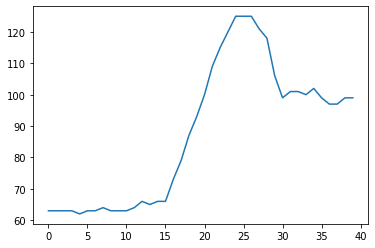

True

In [92]:
if __name__ == '__main__':
    find(cap, ser)

In [224]:
if __name__ == '__main__':
    while(True):
        img = camera.camRead(cap)
        cv2.namedWindow('img', cv2.WINDOW_KEEPRATIO)  
        #arduino.send('B', ser)
        cv2.imshow('img',img)
        #print(sc)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            #cv2.imwrite('output.jpg', img)
            break
            
        
    cv2.destroyAllWindows()

36
4


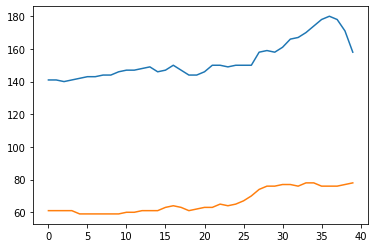

In [32]:
if __name__ == '__main__':
        
    list1 = []
    list2 = []
        #Up 20 step
    for i in range(20):        
        img = camera.camRead(cap) 
        cv2.namedWindow('img', cv2.WINDOW_KEEPRATIO)
        cv2.imshow('img',img)
        time.sleep(0.03)
        cv2.waitKey(1)
        Up(ser)

    #Down 40 step and record the change of clarity
    for i in range(40):
        time.sleep(0.03)
        img = camera.camRead(cap) 
        
        cv2.imshow('img',img)
        a = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        a = cv2.blur(a, (5,5))
        cv2.waitKey(1)
        list1.append(np.max(a))
        list2.append(np.min(a))
        Down(ser)
    

    print(list1.index(max(list1)))
    print(list2.index(min(list2)))
    plt.plot(list1)
    plt.plot(list2)


In [12]:
cv2.destroyAllWindows()

In [222]:
if __name__ == '__main__':
    camera.closeCam(cap)
    arduino.closeSer(ser)


In [229]:
if __name__ == '__main__':
    while(True):
        img = camera.camRead(cap)
        cv2.namedWindow('img', cv2.WINDOW_KEEPRATIO)  
        #arduino.send('B', ser)
        cv2.imshow('img',img)
        #print(sc)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            #cv2.imwrite('output.jpg', img)
            break
            
        
    cv2.destroyAllWindows()

In [230]:
for i in range(20):
    Up(ser)
    time.sleep(0.03)

In [231]:
if __name__ == '__main__':
    
    count = 1
    for i in range(40):
        
        img = camera.camRead(cap)    
        name = 'img/0115/SSS 5CB 20um HGA A520/6/'+str(count)+'.jpg'
        cv2.imwrite(name, img)
        #print(sc)
        Down(ser)
        time.sleep(0.03)
        count= count +1
        
    
    cv2.destroyAllWindows()
    #arduino.closeSer(ser)
    #camera.closeCam(cap)

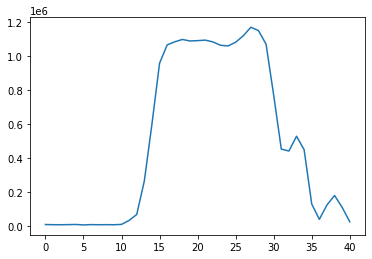

In [25]:
if __name__ == '__main__':
    list1 = []

    while(1):
        
        img = camera.camRead(cap)    

        a = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        a = cv2.blur(img, (7, 7))
        ed  = cv2.Canny(a, 40, 50) 
        cv2.imshow('ed', ed)
        sc = np.sum(ed)
        list1.append(sc)  
        cv2.namedWindow('img', cv2.WINDOW_KEEPRATIO)  
        cv2.imshow('img',img)
        name = 'img/focal/4/'+str(sc)+'.jpg'
        cv2.imwrite(name, img)
        name = 'img/focal/4/'+str(sc)+'-1.jpg'
        cv2.imwrite(name, ed)
        #print(sc)
        t=Down(ser)
        time.sleep(0.5)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break
        
        
    plt.plot(list1)
    cv2.destroyAllWindows()
    #arduino.closeSer(ser)
    #camera.closeCam(cap)

12
13


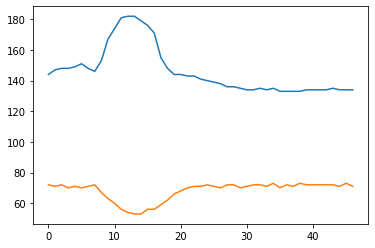

In [18]:
if __name__ == '__main__':
        
    list1 = []
    list2 = []
    path = 'focal/test/'
    photos = os.listdir('C:/Users/user/macs/img/focal/test/')
    for name in photos:
        img = camera.readImg(path+name)   
        a = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        a = cv2.blur(a, (5,5))
        ma = np.max(a)
        mi = np.min(a)
        
        
        list1.append(ma)
        list2.append(mi) 
        #print(name+':'+str(sumsc))

    print(list1.index(max(list1)))
    print(list2.index(min(list2)))
    plt.plot(list1)
    plt.plot(list2)


13


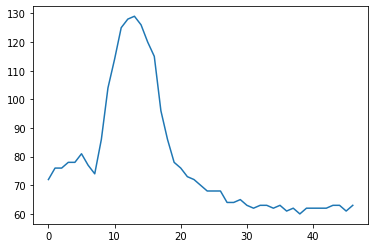

In [19]:
if __name__ == '__main__':
        
    list1 = []
    path = 'focal/test/'
    photos = os.listdir('C:/Users/user/macs/img/focal/test/')
    for name in photos:
        img = camera.readImg(path+name)   
        a = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        a = cv2.blur(a, (5,5))
        ma = np.max(a)
        mi = np.min(a)
        
        
        list1.append(ma-mi)

    print(list1.index(max(list1)))
    plt.plot(list1)


20
29
20
28


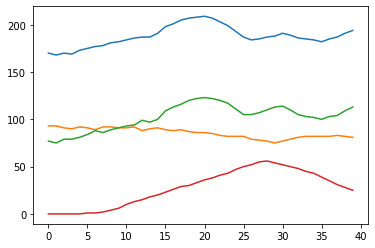

In [31]:
if __name__ == '__main__':
        
    list1 = []
    list2 = []
    list3 = []
    list4 = []
    path = '0115/SSS(0)5CB 12um HTA/1/'
    photos = os.listdir('C:/Users/user/macs/img/0115/SSS(0)5CB 12um HTA/1')
    for name in photos:
        img = camera.readImg(path+name)   
        a = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        a = cv2.blur(a, (5,5))
        ma = np.max(a)
        mi = np.min(a)
        a = cv2.Canny(a, 12,24) 
        sc = np.sum(a)
        
        
        #list1.append(ma-mi)
        list1.append(ma)
        list2.append(mi) 
        list3.append(ma-mi)
        list4.append(sc//500000)
        #print(name+':'+str(sumsc))

    print(list1.index(max(list1)))
    print(list2.index(min(list2)))
    print(list3.index(max(list3)))
    print(list4.index(max(list4)))
    plt.plot(list1)
    plt.plot(list2)
    plt.plot(list3)
    plt.plot(list4)

    #print(list1.index(max(list1)))
    #plt.plot(list1)


20
17
20
22


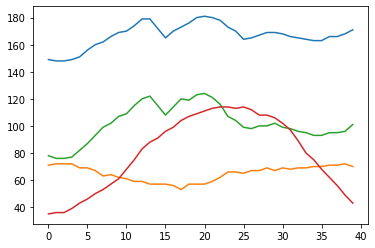

In [29]:
if __name__ == '__main__':
        
    list1 = []
    list2 = []
    list3 = []
    list4 = []
    path = '0115/SSS 5CB 20um HGA A520/1/'
    photos = os.listdir('C:/Users/user/macs/img/0115/SSS 5CB 20um HGA A520/1')
    for name in photos:
        img = camera.readImg(path+name)   
        a = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        a = cv2.blur(a, (5,5))
        ma = np.max(a)
        mi = np.min(a)
        a = cv2.Canny(a, 12,24) 
        sc = np.sum(a)
        
        
        #list1.append(ma-mi)
        list1.append(ma)
        list2.append(mi) 
        list3.append(ma-mi)
        list4.append(sc//50000)
        #print(name+':'+str(sumsc))

    print(list1.index(max(list1)))
    print(list2.index(min(list2)))
    print(list3.index(max(list3)))
    print(list4.index(max(list4)))
    plt.plot(list1)
    plt.plot(list2)
    plt.plot(list3)
    plt.plot(list4)

    #print(list1.index(max(list1)))
    #plt.plot(list1)


26


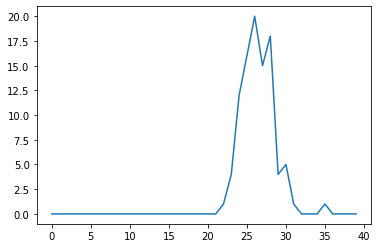

In [16]:
if __name__ == '__main__':
        
    list1 = []
    path = '0115/SSS(0)5CB 12um HTA/1/'
    photos = os.listdir('C:/Users/user/macs/img/0115/SSS(0)5CB 12um HTA/1')
    for name in photos:
        img_o = camera.readImg(path+name)  
        img = cv2.cvtColor(img_o,cv2.COLOR_BGR2GRAY)
        img = cv2.blur(img, (5,5))
        #cv2.namedWindow('img', cv2.WINDOW_KEEPRATIO)  
        #cv2.imshow('img',img)
        circles= cv2.HoughCircles(img ,cv2.HOUGH_GRADIENT,1,15,param1=40,param2=30,minRadius=10,maxRadius=30)
        

        if circles is None:
            sc = 0
        else:             
            sc = circles.shape[1]  
            '''
            for circle in circles[0]:
                #position
                x=int(circle[0])
                y=int(circle[1])
                #radius
                r=int(circle[2])
                
                img_c = cv2.circle(img_o,(x,y),r,(0,0,255),5,8,0)
            cv2.namedWindow('circle', cv2.WINDOW_NORMAL)
            cv2.imshow('circle',img_c)        
            cv2.waitKey(1000) 
            '''
            
        list1.append(sc)
        #print(name+':'+str(sc))


    print(list1.index(max(list1)))
    plt.plot(list1)
    cv2.destroyAllWindows()


In [25]:
if __name__ == '__main__':
        
    list1 = []
    photos = os.listdir('C:/Users/user/macs/img/0115/SSS 5CB 20um HGA A520/1')
    for name in photos:
        x = name.split('.')[0]
        if int(x)<10:
            os.rename('C:/Users/user/macs/img/0115/SSS 5CB 20um HGA A520/1/'+name,'C:/Users/user/macs/img/0115/SSS 5CB 20um HGA A520/1/'+'0'+name)


    

In [11]:
def edge(img):

    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.blur(img, (5,5))
    img = cv2.Canny(img, 12,24)     
    

    return img

In [19]:
def testDoWn():
    list1 = []
    while(True):
        img = camera.camRead(cap)
        cv2.imshow('img',img)
        ed = edge(img)
        cv2.imshow('ed',ed)
        sc = score(img)
        list1.append(sc)
        name = 'img/0108/'+str(sc)+'.jpg'
        cv2.imwrite(name, img)
        name = 'img/0108/'+str(sc)+'-1.jpg'
        cv2.imwrite(name, ed)
        #print(sc)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            #cv2.imwrite('output.jpg', img)
            break
        t=Up(ser)
            
    plt.plot(list1)
    cv2.destroyAllWindows()
    #arduino.closeSer(ser)
    #camera.closeCam(cap)

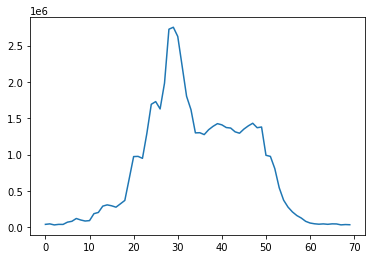

In [20]:
#testDoWn()

In [17]:
def testUP():
    cap = camera.openCam()
    ser = arduino.openSer()
    arduino.send('S', ser)
    list1 = []
    while(True):
        img = camera.camRead(cap)
        cv2.imshow('img',img)
        ed = edge(img)
        cv2.imshow('ed',ed)
        sc = score(ed)
        list1.append(sc)
        name = 'img/UP/'+str(sc)+'.jpg'
        cv2.imwrite(name, img)
        #print(sc)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            #cv2.imwrite('output.jpg', img)
            break
        t=Up(ser)
            
    plt.plot(list1)
    cv2.destroyAllWindows()

In [6]:
def find1(cap, ser):
    #Up 20 step
    for i in range(20):
        time.sleep(0.03)
        img = camera.camRead(cap) 
        Up(ser)

    #Down 40 step and record the change of clarity
    list1 = []
    for i in range(40):
        time.sleep(0.03)
        img = camera.camRead(cap) 
        sc = score(img)
        list1.append(sc)
        Down(ser)
    
    #if there is nothing on the screen, just return to the original place and skip
    if(blank(list1)):
        for i in range(20):
            Up(ser)
        return False

    #find max value
    maxsc = max(list1)
    
    #sweep to find the highest score
    floor = 0
    jump = False
    direction = 1
    c = 100 #count

    while(c> 2 and jump == False): 
        c = 0 
        floor = (floor+maxsc)/2
        #print('floor:',floor)

        while(sc < floor):
            sweep(direction, ser)
            time.sleep(0.03)
            img = camera.camRead(cap)            
            sc = score(img)
            #print('a:',sc)

        while(sc > floor):            
            sweep(direction, ser)
            time.sleep(0.03)
            img = camera.camRead(cap)
            sc = score(img)
            #print('b:',sc)
            c+=1
            if sc > maxsc:
                jump = True
                break
        direction = (1+direction)%2
        #print('c:',c)
    
    cv2.imshow('img',img)
    #name = 'img/test.jpg'
    #cv2.imwrite(name, img)
    plt.plot(list1)
    plt.show()
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return True


In [18]:
def find2(cap, ser):
    #list1 = []

    for i in range(20):
        '''
        img = camera.camRead(cap)
        cv2.imshow('img',img)       
        sc = score(img)
        list1.append(sc)
        '''
        Up(ser)

    list2 = []
    for i in range(35):
        img = camera.camRead(cap)  
        cv2.imshow('img',img) 
        sc = score(img)
        list2.append(sc)
        Down(ser)
    
    cv2.destroyAllWindows()
    #print(max(list1)*0.9)
    print(max(list2))
    #while(sc < max(list1)*0.9 | sc < max(list2)*0.9): 
    m = 0
    c = 0
    while(sc < max(list2)):   
        Up(ser)     
        img = camera.camRead(cap)
        cv2.imshow('img',img) 
        sc = score(img)
        print(sc)
        if sc > m:
            m = sc     

        if sc < m:
            c += 1
        else :
            c = 0
        print(m, c)
        #if c > 2 | sc > max(list2)*0.9:
        if c > 1 & sc > max(list2)*0.9:
            break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            #cv2.imwrite('output.jpg', img)
            break

    arduino.send('S', ser)
    name = 'img/test.jpg'
    cv2.imwrite(name, img)
    #plt.plot(list1)
    #plt.show()
    plt.plot(list2)
    plt.show()
    cv2.destroyAllWindows()
    return True
